# Drunkard Walk Notebook

This notebook provides a demonstration of a random walk using a Markov chain simulation. An algorithm devised to calculate a probability of the drunk's steps is presented, taking into account that the drunk can arrival at both destinations is possible regardless of where he starts.  Canonical, Fundamental Matrix and Spectral Decomposition are used. After analysis of the results, we obtain the values of the highest probability of the drunkards position in the limit of a large number of steps. <br>
We assume this walk is done on a single axis moving only left or right with user assigned probabilities for each directions.

### Modulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Function to generate Transition Matrix.

In [2]:
def generate_transition_matrix(right, dimension):
    left = 1 - right
    transition_matrix= np.diag(left*np.ones(dimension), k=-1) + np.diag(right*np.ones(dimension), k=1) 
    transition_matrix[0, :] = 0
    transition_matrix[0, 0] = 1
    transition_matrix[dimension, :] = 0
    transition_matrix[dimension, dimension] = 1
    return transition_matrix

In [3]:
X = float(input('Probability of moving right: '))
print(f'Probability of moving left: {1-X:.2f}')
Y = int(input('Location of Home (some integer values): '))
bar = int(input('Location of Bar (some integer values): '))
trans_matrix = generate_transition_matrix(X,Y)

Probability of moving right: 0.45
Probability of moving left: 0.55
Location of Home (some integer values): 600
Location of Bar (some integer values): 0


### Transition Matrix

In [4]:
trans_matrix

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.55, 0.  , 0.45, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.55, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.45, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.55, 0.  , 0.45],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

### Canonical Form

In [5]:
A = [0, Y]
B = range(1, Y)
P = generate_transition_matrix(X,Y)
identity_matrix = P[np.ix_(A, A)]
absorbent_matrix = P[np.ix_(B, A)]
transient_matrix = P[np.ix_(B, B)]
null_matrix = np.zeros([len(identity_matrix),len(transient_matrix)])
print(f"\nTransient matrix:\n{transient_matrix}\n\nTransient Matrix --> Absorbent:\n{absorbent_matrix}\n\nNull Matrix:\n{null_matrix}\n\nIdentity matrix:\n{identity_matrix}")


Transient matrix:
[[0.   0.45 0.   ... 0.   0.   0.  ]
 [0.55 0.   0.45 ... 0.   0.   0.  ]
 [0.   0.55 0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.45 0.  ]
 [0.   0.   0.   ... 0.55 0.   0.45]
 [0.   0.   0.   ... 0.   0.55 0.  ]]

Transient Matrix --> Absorbent:
[[0.55 0.  ]
 [0.   0.  ]
 [0.   0.  ]
 ...
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.45]]

Null Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Identity matrix:
[[1. 0.]
 [0. 1.]]


### Fundamental Matrix

In [6]:
fundamental_matrix_ind= (np.eye(len(transient_matrix)))
subtraction = np.subtract(fundamental_matrix_ind,transient_matrix)
fundamental_matrix = np.linalg.inv(subtraction)
np.set_printoptions(suppress = True, precision=3)
vector_t = fundamental_matrix.sum(axis=1)
matrix_b = np.dot(fundamental_matrix,absorbent_matrix)
print(f"Fundamental Matrix:\n{fundamental_matrix}\n\nVector t:\n{vector_t}\n\nMatrix B:\n{matrix_b}")

Fundamental Matrix:
[[1.818 1.488 1.217 ... 0.    0.    0.   ]
 [1.818 3.306 2.705 ... 0.    0.    0.   ]
 [1.818 3.306 4.523 ... 0.    0.    0.   ]
 ...
 [0.822 1.495 2.046 ... 4.523 2.705 1.217]
 [0.601 1.093 1.495 ... 3.306 3.306 1.488]
 [0.331 0.601 0.822 ... 1.818 1.818 1.818]]

Vector t:
[  10.      20.      30.      40.      50.      60.      70.      80.
   90.     100.     110.     120.     130.     140.     150.     160.
  170.     180.     190.     200.     210.     220.     230.     240.
  250.     260.     270.     280.     290.     300.     310.     320.
  330.     340.     350.     360.     370.     380.     390.     400.
  410.     420.     430.     440.     450.     460.     470.     480.
  490.     500.     510.     520.     530.     540.     550.     560.
  570.     580.     590.     600.     610.     620.     630.     640.
  650.     660.     670.     680.     690.     700.     710.     720.
  730.     740.     750.     760.     770.     780.     790.     800.
  810

### Calculation of Eigenvalues and Eigenvectors

In [7]:
np.set_printoptions(suppress= True,precision=3)
eigenvalue, eigenvector = np.linalg.eig(trans_matrix.T)
print(f'Eigenvalues:\n{eigenvalue}\n\nMatrix of normalized eigenvectors:\n{eigenvector}')

Eigenvalues:
[ 1.   +0.j     1.   +0.j    -0.966+0.002j -0.966-0.002j -0.968+0.001j
 -0.968-0.001j -0.97 +0.j    -0.97 -0.j    -0.978+0.j    -0.98 +0.j
 -0.981+0.j    -0.982+0.j    -0.983+0.j    -0.988+0.j    -0.988+0.j
 -0.989+0.j    -0.989-0.j    -0.992+0.j    -0.993+0.001j -0.993-0.001j
 -0.994+0.001j -0.994-0.001j -0.995+0.001j -0.995-0.001j -0.995+0.j
 -0.995-0.j    -0.995+0.001j -0.995-0.001j -0.994+0.j     0.945+0.j
  0.962+0.j     0.965+0.j     0.966+0.j     0.971+0.j     0.973+0.j
  0.976+0.j     0.977+0.j     0.978+0.j     0.979+0.j     0.98 +0.j
  0.981+0.j     0.983+0.j     0.983+0.j     0.989+0.j     0.99 +0.001j
  0.99 -0.001j  0.991+0.001j  0.991-0.001j  0.992+0.001j  0.992-0.001j
  0.993+0.j     0.994+0.j     0.995+0.j     0.995-0.j     0.995+0.j
  0.995-0.j     0.995+0.j     0.994+0.j     0.994-0.j     0.914+0.001j
  0.914-0.001j  0.921+0.j     0.924+0.j     0.926+0.j     0.932+0.j
  0.947+0.j     0.949+0.j    -0.935+0.j    -0.939+0.j    -0.941+0.j
 -0.944+0.j    -0.94

### Spectral Decomposition (Eigenvalue - Eigenvector Decomposition of a Matrix)

In [8]:
np.set_printoptions(suppress= True,precision=3)
diagonalmatrix = np.diag(eigenvalue)
inverse_eigenvector_matrix = np.linalg.inv(eigenvector)
decomposed_sas = np.matmul(np.matmul(eigenvector,diagonalmatrix),np.linalg.inv(eigenvector))
print(f'S (eigenvector) Matrix:\n{eigenvector}\nDiagonal Matrix (Λ):\n{diagonalmatrix}\nInverse eigenvector Matrix (S-¹):\n{inverse_eigenvector_matrix}\nFactorized/Decomposed (SΛS-¹):\n{decomposed_sas}')

S (eigenvector) Matrix:
[[ 1.   +0.j     0.   +0.j     0.042+0.001j ...  0.258+0.j
   0.35 +0.j    -0.302+0.j   ]
 [ 0.   +0.j     0.   +0.j    -0.149-0.002j ... -0.548+0.j
  -0.531+0.j     0.548+0.j   ]
 [ 0.   +0.j     0.   +0.j     0.261+0.003j ...  0.165+0.j
  -0.16 +0.j    -0.   +0.j   ]
 ...
 [ 0.   +0.j     0.   +0.j    -0.   -0.j    ...  0.   +0.j
  -0.   +0.j    -0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j    ...  0.   +0.j
  -0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     1.   +0.j    -0.   -0.j    ... -0.   +0.j
   0.   +0.j    -0.   +0.j   ]]
Diagonal Matrix (Λ):
[[ 1.   +0.j     0.   +0.j     0.   +0.j    ...  0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     1.   +0.j     0.   +0.j    ...  0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j    -0.966+0.002j ...  0.   +0.j
   0.   +0.j     0.   +0.j   ]
 ...
 [ 0.   +0.j     0.   +0.j     0.   +0.j    ... -0.166+0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j    

# Simulating the Drunkard's Walk


Starting Position 244



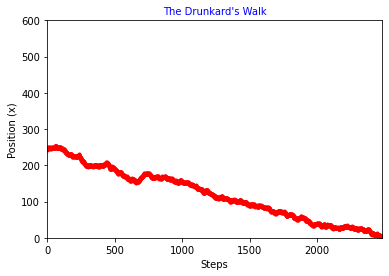

Drunkard arrives at Bar 2478 steps.


In [13]:
table=[]
while True:
    pos_initial = int(input('Starting Position '))
    print()
    if (pos_initial>=Y or pos_initial<=0):
        print('Invalid Input Value')
    else:
        actual_value=pos_initial
        table.append(actual_value)
        break
end = 0
while True:
    end +=1
    random_val = random.random()
    if (random_val > X):
        actual_value-=1
        table.append(actual_value)
    else:
        actual_value+=1
        table.append(actual_value)

    if (actual_value == Y or actual_value == bar):
        break


plt.title("The Drunkard's Walk",fontsize = 10, c='b')
plt.plot(table,c='r', lw=0.2, ls=' ',marker='.')
plt.axis([0,end,bar,Y])
plt.xlabel("Steps",fontsize = 10)
plt.ylabel("Position (x)",fontsize = 10)
plt.show()
steps = 0
for i in table:
    steps += 1
if table[-1] == bar:
    print(f'Drunkard arrives at Bar {steps-1} steps.') 
else:
    print(f'Drunkard arrives Home {steps-1} steps.') 